______
Employee Attrition Analysis

by: Fadhiil Dzaki Mulyana

Notebook ini dibuat guna melakukan exploratory data analysis terhadap employee attrition.
_____

# A. Identifikasi Masalah

**Dashboard:**<br>
[Employee Attrition Analysis](https://public.tableau.com/app/profile/fadhiil.dzaki.mulyana/viz/tablue_fadhiil/AttritionAnalysis)

**Data Description:**<br>
[Employee Attrition and Factors](https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors/data)

Dataset ini menganalisis berbagai aspek karyawan dalam organisasi, seperti employee attrition, faktor pribadi dan pekerjaan, serta finansial. Parameternya mencakup usia, jenis kelamin, status pernikahan, gaji, perjalanan bisnis, jam kerja, kenaikan gaji, penilaian kinerja, kepuasan hubungan, dan jumlah pekerjaan sebelumnya. Dataset ini juga mencakup status pensiun atau attrition, memberikan wawasan tentang perubahan filosofi manajemen tenaga kerja modern.

| Nama Kolom                  | Deskripsi                                                               |
|-----------------------------|-------------------------------------------------------------------------|
| Age                         | Usia karyawan. (Numerik)                                                |
| Attrition                   | Apakah karyawan telah meninggalkan organisasi. (Kategorikal)            |
| BusinessTravel              | Frekuensi perjalanan bisnis karyawan. (Kategorikal)                     |
| DailyRate                   | Tingkat gaji harian karyawan. (Numerik)                                 |
| Department                  | Departemen tempat karyawan bekerja. (Kategorikal)                       |
| DistanceFromHome            | Jarak rumah karyawan dalam mil. (Numerik)                               |
| Education                   | Tingkat pendidikan yang dicapai oleh karyawan. (Kategorikal)            |
| EducationField              | Bidang studi pendidikan karyawan. (Kategorikal)                         |
| EmployeeCount               | Total jumlah karyawan dalam organisasi. (Numerik)                       |
| EmployeeNumber              | Identifikasi unik untuk setiap profil karyawan. (Numerik)               |
| EnvironmentSatisfaction     | Kepuasan karyawan terhadap lingkungan kerja (1-4). (Kategorikal)        |
| Gender                      | Jenis kelamin karyawan. (Kategorikal)                                   |
| HourlyRate                  | Tingkat gaji per jam karyawan. (Numerik)                                |
| JobInvolvement              | Tingkat keterlibatan dalam pekerjaan (1-4). (Kategorikal)               |
| JobLevel                    | Tingkat jabatan karyawan. (Kategorikal)                                 |
| JobRole                     | Peran karyawan dalam organisasi. (Kategorikal)                          |    
| JobSatisfaction             | Kepuasan karyawan terhadap pekerjaannya (1-4). (Kategorikal)            |  
| MaritalStatus               | Status pernikahan karyawan. (Kategorikal)                               |
| MonthlyIncome               | Pendapatan bulanan karyawan. (Numerik)                                  |
| MonthlyRate                 | Tingkat gaji bulanan karyawan. (Numerik)                                |
| NumCompaniesWorked          | Jumlah perusahaan tempat karyawan pernah bekerja. (Numerik)             |
| Over18                      | Apakah karyawan berusia di atas 18 tahun. (Kategorikal)                 |
| OverTime                    | Apakah karyawan bekerja lembur. (Kategorikal)                           |
| PercentSalaryHike           | Persentase kenaikan gaji karyawan. (Numerik)                            |
| PerformanceRating           | Penilaian kinerja karyawan. (Kategorikal)                               |
| RelationshipSatisfaction    | Kepuasan karyawan terhadap hubungan kerja (1-4). (Kategorikal)          |
| StandardHours               | Jam kerja standar karyawan. (Numerik)                                   |
| StockOptionLevel            | Tingkat opsi saham karyawan. (Kategorikal)                              |
| TotalWorkingYears           | Total jumlah tahun karyawan telah bekerja. (Numerik)                    |
| TrainingTimesLastYear       | Jumlah pelatihan yang diikuti karyawan tahun lalu. (Numerik)            |
| WorkLifeBalance             | Persepsi karyawan terhadap keseimbangan kerja-hidup (1-4). (Kategorikal)|
| YearsAtCompany              | Jumlah tahun karyawan bekerja di perusahaan. (Numerik)                  |
| YearsInCurrentRole          | Jumlah tahun karyawan dalam peran saat ini. (Numerik)                   |
| YearsSinceLastPromotion     | Jumlah tahun sejak promosi terakhir karyawan. (Numerik)                 |
| YearsWithCurrManager        | Jumlah tahun karyawan bekerja dengan manajer saat ini. (Numerik)        |


**Background:**<br>
PT. Indo performance adalah sebuah perusahaan di industri kesehatan dengan tingkat employee attrition sebesar 16% pada tahun terakhir. Angka ini tergolong cukup tinggi dibandingkan rata-rata industri, yang dapat menjadi indikator adanya masalah mendasar dalam pengelolaan SDM perusahaan. Oleh karena itu, perusahaan menetapkan target untuk menurunkan tingkat employee attrition sebesar 6% dalam kurun waktu 12 bulan ke depan. Hasil dari analisis ini diharapkan dapat memberikan wawasan yang mendalam bagi manajemen untuk merumuskan strategi yang efektif dalam meningkatkan retensi karyawan.

**Problem Statement:**<br>
Mengurangi Persentase turnover sebanyak 6% dalam waktu 12 bulan dengan mengidentifikasi pola, tren, dan faktor-faktor utama penyebab turnover. Pemahaman yang baik mengenai faktor-faktor turnover akan membantu dalam pengambilan keputusan untuk meningkatkan retensi karyawan sekaligus  mengurangi biaya operasional, meningkatkan loyalitas karyawan, meningkatkan citra perusahaan, menjaga produktivitas dan mental tim.

**Problem Breakdown:**<br>


# Libraries & Fucntion

## Libraries

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistik
from scipy.stats import chi2_contingency, kendalltau

# prep
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Functions

In [2]:
# overview
def check_overview(df):
    '''
    df_overview adalah fungsi yang digunakan untuk melihat informasi seputar dataset.

    Argumen:
    df = dataset yang digunakan.

    Output:
    Informasi overall dataset, missing value, duplicated value dan jumlah unique value setiap kolom.
    '''
    # df overview
    print(df.info())

    # cek missing value
    print(f"\nmissing values: {round(((df.isna().sum().sum())/len(df))*100, 2)}% \n{df.isna().sum()[df.isna().sum()>0]}")

    # cek duplicated value
    print(f"\nduplicated values: {round(((df.duplicated().sum())/len(df))*100,2)}% \n{df.duplicated().sum()}\n")

    # cek nama kolom & jumlah unique value
    for col in df:
        print(f'{col}-#nunique: {df[col].nunique()}')

# fungsi cek outlier
def check_outlier(df, kolom):
    '''
    argumen:
    df = dataframe
    kolom = kolom numerik [list]
    multiplier = pengkali dalam metode IQR (1.5 / 3)
    '''
    # mengecek deskriptif stats
    deskriptif = check_deskriptif(df,kolom)

    # batas atas
    upper_fence = []
    #batas bawah
    lower_fence = []
    # persentase outlier
    percent_outlier = []

    # looping untuk mengisi list kosong
    for i in kolom:
        # bentuk distribusi
        bentuk_dist = deskriptif['jenis_skewness'][i]
        # besar skewness
        besar_skew = deskriptif['skewness'][i]

        # jika bentuk distribusi skew
        if bentuk_dist == 'skewed':
            # jika outlier kecil
            if -1 < besar_skew < 1:
                # mencari Q1,Q2 dan IQR
                Q3 = df[i].quantile(0.75)
                Q1 = df[i].quantile(0.25)
                IQR = Q3-Q1
                
                # menghitung boundaries
                batas_bawah = Q1-1.5*IQR
                batas_atas = Q3+1.5*IQR
            # jika outlier extreeme
            else:
                # mencari Q1,Q2 dan IQR
                Q3 = df[i].quantile(0.75)
                Q1 = df[i].quantile(0.25)
                IQR = Q3-Q1
                # menghitung boundaries
                batas_bawah = Q1-3*IQR
                batas_atas = Q3+3*IQR

        # jika bentuk distribusi normal
        else:
            # rata2 dan st. deviasi
            avg = df[i].mean()
            std = df[i].std()

            # boundaries
            batas_atas = avg + 3*std
            batas_bawah = avg - 3*std

        # menghitung persentase outlier
        persentase_out = ((len(df[df[i] > batas_atas]) / len(df) * 100) + (len(df[df[i] < batas_bawah]) / len(df) * 100))
        persentase_out = round(persentase_out,2)

        # boundaries adn percentage add
        lower_fence.append(batas_bawah)
        upper_fence.append(batas_atas)
        percent_outlier.append(persentase_out)

    # convert to df
    outlier = pd.DataFrame({
        'batas_atas': upper_fence,
        'batas_bawah': lower_fence,
        'persentase' : percent_outlier},
        index=kolom
        )
    # mengembalikan outlier
    return outlier

# VIZ
# fungsi boxplot
def plot_boxplot(df,kolom):
    for i in range(0,len(kolom)):
        plt.subplot(1,len(kolom),i+1)
        sns.boxplot(y=df[kolom[i]])
        plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)
        plt.title(kolom[i])
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# STATISTICS
# fungsi cek deskriptif stats
def check_deskriptif(df, kolom):
    '''
    Fungsi ini digunakan untuk mengetahui statistik deskriptif.

    Argumen:
    - df = DataFrame
    - kolom = List dari kolom numerik

    Return:
    - DataFrame yang berisi deskriptif statistik data.
    '''
    # deskriptif stats
    deskriptif = df[kolom].describe().T

    # List untuk menyimpan nilai
    skewness_values = []
    jenis_skewness = []

    # Loop untuk menghitung skewness dan kurtosis setiap kolom
    for i in kolom:
        # Menghitung skewness
        skew = df[i].skew()
        skewness_values.append(skew)
        
        # Menentukan jenis skewness
        if -0.5 <= skew <= 0.5:
            jenis_skewness.append('normal')
        else:
            jenis_skewness.append('skewed')

    # Membuat kolom baru dalam deskriptif
    deskriptif['skewness'] = skewness_values
    deskriptif['jenis_skewness'] = jenis_skewness

    return deskriptif

# fungsi uji kendall
def uji_kendall(df,kolom_1, kolom_2):
    '''
    argumen:
    df = dataset
    kolom_1 = kolom fitur
    kolom_2 = kolom target
    '''    
    #uji stats
    stat, p_value = kendalltau(df[kolom_1],df[kolom_2])

    # hasil
    print(f'koefisien corr = {stat}')
    print(f'pvalue = {p_value}')

    if p_value < 0.05:
        print(f'H0 berhasil ditolak: {kolom_1} berkorelasi terhadap {kolom_2}\n')
    else:
        print(f'H0 gagal ditolak: {kolom_1} TIDAK berkorelasi terhadap {kolom_2}\n')

    return stat, p_value

# fungsi crosstab
def crosstable(df,a,b):
    '''
    fungsi ini digunakan untuk membuat cross tabulation dari 2 variable berbeda

    argumen:
    df = dataframe yang digunakan
    a = variable yang ingin dibandingkan
    b = variable pembanding

    output:
    cross table
    '''
    # cross tabulation
    chi_tab = pd.crosstab(df[a], df[b])
    # mengembalikan chi_tab
    return chi_tab

# fungsi chi2_contigency
def uji_chisquare(df,kolom_1,kolom_2):
    '''
    fungsi ini digunakan untuk melakukan perhitungan statistika chisquared

    argumen:
    df = dataframe yang digunakan
    a = variable yang ingin dibandingkan
    b = variable pembanding

    Output:
    chi-squared statistic, p-value, degrees of freedom, expected frequencies
    '''
    # chi2 calculation
    chi2, p_value, dof, expected = chi2_contingency(crosstable(df,kolom_1,kolom_2))

    if p_value < 0.05:
        print(f'H0 berhasil ditolak: {kolom_1} berkorelasi terhadap {kolom_2}\n')
    else:
        print(f'H0 gagal ditolak: {kolom_1} TIDAK berkorelasi terhadap {kolom_2}\n')
    
    # mengembalikan nilia nilai hasil kalkulasi
    return chi2, p_value, dof

# Data Loading

## Load Data

In [3]:
# load data
df = pd.read_csv('HR_Analytics.csv')

# Set the display option to show all columns
pd.set_option('display.max_columns', None) 

# check
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Overview


In [4]:
# overview
check_overview(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# define categorical & numerical column
cat = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
num = df.drop(columns=cat).columns.tolist()

# check
print(f'cat: {cat}')
print(f'num: {num}')

cat: ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
num: ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [6]:
# melihat unique value kolom kategorik
for i in cat:
    print(i,':',df[i].unique().tolist())

Attrition : ['Yes', 'No']
BusinessTravel : ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
Department : ['Sales', 'Research & Development', 'Human Resources']
Education : [2, 1, 4, 3, 5]
EducationField : ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
EnvironmentSatisfaction : [2, 3, 4, 1]
Gender : ['Female', 'Male']
JobInvolvement : [3, 2, 4, 1]
JobLevel : [2, 1, 3, 4, 5]
JobRole : ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
JobSatisfaction : [4, 2, 3, 1]
MaritalStatus : ['Single', 'Married', 'Divorced']
Over18 : ['Y']
OverTime : ['Yes', 'No']
PerformanceRating : [3, 4]
RelationshipSatisfaction : [1, 4, 2, 3]
StockOptionLevel : [0, 1, 3, 2]
WorkLifeBalance : [1, 3, 2, 4]


**Dataset Overview:**
- Dataset memiliki 1470 baris dan 35 kolom:
    - Numerik:<br> 
        'Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'.
    - Kategorik:<br>
        'Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'.
- Ada beberapa kolom kategorikal ordinal yang sudah ter encode seperti:<br> 
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', RelationshipSatisfaction, 'StockOptionLevel', dan 'WorkLifeBalance', 'PerformanceRating', 'JobLevel'.
- Nama kolom pada dataset sudah konsisten dan tidak memiliki whitespace.

**Missing Value:**
- Tidak terdapat missing value.

**Duplicated Value:**
- Tidak terdapat duplicated value

**Cardinality:**
- 'EmployeeCount', 'Over18', 'StandardHours' hanya memiliki 1 unique value, tidak memberikan informasi tambahan apapun. `drop`
- 'EmployeeNumber' merupakan unique identifier setiap karyawan, yang tidak dibutuhkan dalam analisis ini. `drop`
- Jumlah unique value selain ketiga kolom tersebut terlihat normal.
- Value pada 'BusinessTravel' mengandung underscore ("_") sebagai pengganti spasi yang berbeda dengan value pada kolom-kolom lain. `ganti dengan spasi`

In [7]:
# save
df_org = df.copy()

In [8]:
# load
df = df_org.copy()

# Feature Engeneering

## Column Manipulation

'EmployeeCount', 'Over18', 'StandardHours' hanya memiliki 1 unique value, tidak memberikan informasi tambahan apapun. Maka dari itu, kolom kolom tersebut akan dihapus dari dataframe. Selain itu, 'EmployeeNumber' merupakan unique identifier setiap karyawan, yang juga tidak dibutuhkan dalam analisis ini.

In [9]:
# before
print(df.shape)

# define column to drop
drop_col = ['EmployeeNumber','EmployeeCount', 'Over18', 'StandardHours']

# drop columns
df.drop(columns=drop_col, inplace=True)

# remove from list
cat = [i for i in cat if i not in drop_col]
num = [i for i in num if i not in drop_col]

# after
print(df.shape)

# check list
print(f'cat: {cat}')
print(f'num: {num}')

(1470, 35)
(1470, 31)
cat: ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
num: ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours' telah berhasil dihapus.


In [10]:
# save
df_col_mnpl = df.copy()

In [11]:
# load
df = df_col_mnpl.copy()

## Value Manipulation

### Business Travel

Value pada 'BusinessTravel' mengandung underscore sebagai pengganti spasi yang berbeda dengan value pada kolom-kolom lain. Selain itu terdapat duplikasi kata "Travel" yang memiliki makna yang sama. Maka dari itu, "Travel" dan "_" akan dihapus agar mudah dibaca.

In [12]:
# change _ with space
df['BusinessTravel'] = df['BusinessTravel'].str.replace('Travel_', '')

# check
df['BusinessTravel'].unique().tolist()

['Rarely', 'Frequently', 'Non-Travel']

"Travel" dan "_" telah dihapus dan sudah lebih mudah dibaca.

### Job Role

In [13]:
# filter by department
sales = df[df['Department']=='Sales']
hr = df[df['Department']=='Human Resources']
rnd = df[df['Department']=='Research & Development']

# check job role
print('sales:',sales['JobRole'].unique().tolist())
print('hr:',hr['JobRole'].unique().tolist())
print('rnd:',rnd['JobRole'].unique().tolist())

sales: ['Sales Executive', 'Manager', 'Sales Representative']
hr: ['Human Resources', 'Manager']
rnd: ['Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Research Director', 'Manager']


Dapat dilihat bahwa terdapat value yang sama di tiap departemen, yaitu "Manager". Semua value tersebut berbeda sesuai dengan departemennya. Yang dimaksud "Manager" pada departemen HR adalah HR Manager, sedangkan pada departemen Sales adalah Sales Manager, begitu pula dengan departemen RnD. Untuk mengantisipasi kesalahan analisis, kedua manager tersebut akan dipisahkan.

In [14]:
# Manager di Department tertentu
df['JobRole'] = np.where((df['JobRole'] == 'Manager') & (df['Department'] == 'Human Resources'), 'HR Manager',df['JobRole'])
df['JobRole'] = np.where((df['JobRole'] == 'Manager') & (df['Department'] == 'Sales'), 'Sales Manager',df['JobRole'])
df['JobRole'] = np.where((df['JobRole'] == 'Manager') & (df['Department'] == 'Research & Development'), 'RnD Manager',df['JobRole'])


# filter by department
sales = df[df['Department']=='Sales']
hr = df[df['Department']=='Human Resources']
rnd = df[df['Department']=='Research & Development']

# check job role
print('sales:',sales['JobRole'].unique().tolist())
print('hr:',hr['JobRole'].unique().tolist())
print('rnd:',rnd['JobRole'].unique().tolist())

sales: ['Sales Executive', 'Sales Manager', 'Sales Representative']
hr: ['Human Resources', 'HR Manager']
rnd: ['Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Research Director', 'RnD Manager']


Sekarang sudah dapat dibedakan antara Sales Manager dan HR Manager.

In [15]:
# save
df_val_mnpl = df.copy()
df.to_csv('HR_Analytics_Clean.csv', index=False)

In [16]:
# load
df = df_val_mnpl.copy()

# Exploratory Data Analysis

## Deskriptif Statistik

In [17]:
# numeric descriptive
check_deskriptif(df,num)

,count,mean,std,min,25%,50%,75%,max,skewness,jenis_skewness
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0,0.413286,normal
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0,-0.003519,normal
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0,0.958118,skewed
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0,-0.032311,normal
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0,1.369817,skewed
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0,0.018578,normal
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0,1.026471,skewed
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0,0.821128,skewed
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0,1.117172,skewed
TrainingTimesLastYear,1470.0,2.799320,1.289271,0.0,2.0,3.0,3.00,6.0,0.553124,skewed


**Distribusi Usia:**<br>
Mayoritas Pegawai berada pada usia produktif antara 30-43 tahun, dengan rata-rata usia 37 tahun. Usia yang cukup beragam dapat berdampak pada kebutuhan pengembangan karir dan juga fasilitas kesehatan pegawai. Pegawai yang lebih muda mungkin lebih membutuhkan pelatihan keterampilan dasar, sementara yang lebih tua mungkin lebih tertarik pada peluang kepemimpinan atau pra-pensiun.

**Pendapatan & Gaji Bulanan:**<br>
Rata-rata pendapatan bulanan adalah sekitar 6503. Dengan variabilitas yang tinggi, menunjukkan kemungkinan adanya perbedaan besar dalam tingkat jabatan di perusahaan. Distribusi gaji bulanan yang skewed menunjukkan adanya perbedaan dalam penghargaan terhadap karyawan.

**Jarak Tempat Tinggal:**<br>
Rata-rata karyawan tinggal sekitar 9 mil dari tempat kerjanya, tetapi ada beberapa yang tinggal lebih jauh. Jarak tempat tinggal dapat mempengaruhi stress level kakryawan. Karyawan yang tinggal lebih jauh mungkin merasa lebih lelah dan kurang terlibat dalam pekerjaan yang dapat mempengaruhi kepuasan kerja dan atrisi.

**Pengalaman Kerja:**
Sebagian besar karyawan sudah bekerja di 2-3 perusahaan sebelum bergabung dengan perusahaan ini dan sudah bersama perusahaan ini selama 5 tahun. Hal ini mengindikasikan mayoritas karyawan-karyawan dengan pengalaman yang cukup banyak.

## Persentase Turnover

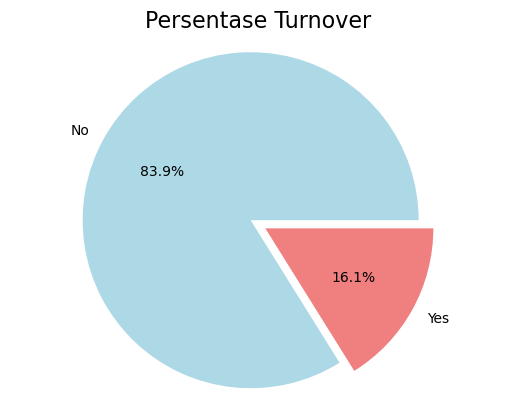

In [18]:
# persentase turnover
persen_to = df['Attrition'].value_counts(normalize=True)

# prep pie chart
label = persen_to.index
size = persen_to.values
explode = (0.1,0)

# pie chart
plt.pie(size,labels=label, autopct='%1.1f%%', explode=explode, colors=['lightblue','lightcoral'])

# add-ons
plt.axis('equal')
plt.title('Persentase Turnover',fontsize=16)

# show plot
plt.show()

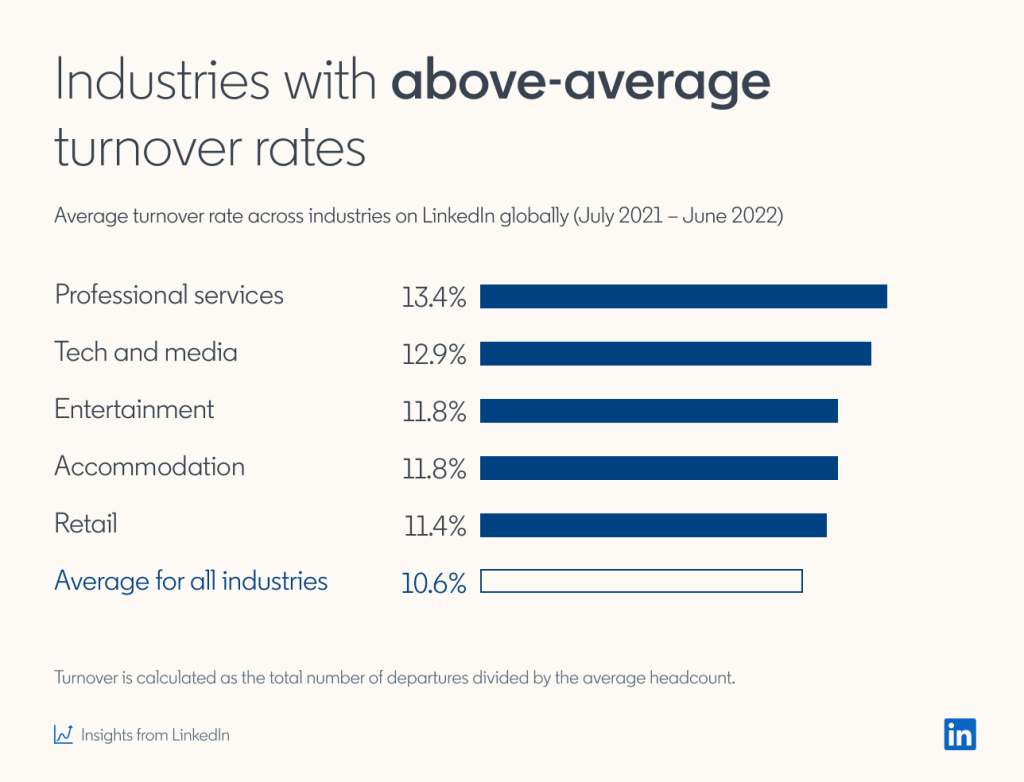

**Persentase Turnover Cukup Tinggi:**
Berdasarkan [LinkedIn Data](https://www.linkedin.com/business/talent/blog/talent-strategy/industries-with-the-highest-turnover-rates), rata-rata turnover seluruh industri adalah 10.6%. Dengan tingkat turnover sebesar 16.1%, artinya sudah lebih sekitar 6 % dari rata-rata turnover normal. Hal ini mengindikasikan perlunya perbaikan dalam perusahaan untuk mengurangi turnover.

## Fitur-Fitur yang Mempengaruhi Atrisi

Untuk mengetahui fitur-fitur apa saja yang mempengaruhi kecenderungan karyawan untuk melakukan turnover perlu dilakukan uji korelasi antara fitur terhadap 'Attrition'.

Untuk fitur numerik akan dikenakan uji kendall, sementara untuk fitur kategorik akan dikenakan uji Chi-Squared dengan hipotesis sebagai berikut:
- H0: Fitur tidak berkorelasi terhadap Attrition.
- H1: Fitur Berkorelasi terhadap Attrition.

In [19]:
for i in df:
    if i != 'Attrition':
        if i in num:
            print(i)
            uji_kendall(df,i,'Attrition')
        else:
            print(i)
            uji_chisquare(df,i,'Attrition')

Age
koefisien corr = -0.14201222845253333
pvalue = 5.301368496104956e-11
H0 berhasil ditolak: Age berkorelasi terhadap Attrition

BusinessTravel
H0 berhasil ditolak: BusinessTravel berkorelasi terhadap Attrition

DailyRate
koefisien corr = -0.0465487066445137
pvalue = 0.028998429662598246
H0 berhasil ditolak: DailyRate berkorelasi terhadap Attrition

Department
H0 berhasil ditolak: Department berkorelasi terhadap Attrition

DistanceFromHome
koefisien corr = 0.06676468094899914
pvalue = 0.0023863831517022243
H0 berhasil ditolak: DistanceFromHome berkorelasi terhadap Attrition

Education
H0 gagal ditolak: Education TIDAK berkorelasi terhadap Attrition

EducationField
H0 berhasil ditolak: EducationField berkorelasi terhadap Attrition

EnvironmentSatisfaction
H0 berhasil ditolak: EnvironmentSatisfaction berkorelasi terhadap Attrition

Gender
H0 gagal ditolak: Gender TIDAK berkorelasi terhadap Attrition

HourlyRate
koefisien corr = -0.005504082640481823
pvalue = 0.7975657845066744
H0 gagal 

**Fitur yang Mempengaruhi Atrisi:**<br>
Fitur-fitur selain 'Education', 'Gender', 'HourlyRate', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', dan 'RelationshipSatisfaction' memiliki pengaruh terhadap Turnover pegawai baik itu positif maupun negatif.

**Korelasi Positif:**<br>
DistanceFromHome, MonthlyRate, dan NumCompaniesWorked memiliki korelasi positif.

**Korelasi Negatif:**<br>
'Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', dan 'YearsWithCurrManager' memiliki korelasi negatif terhadap atrisi pegawai.

## Karakteristik Demografis Atrisi Pegawai

In [20]:
# copy
df_demo = df.copy()
df_demo['Education'] = df_demo['Education'].astype('object')

# Statistik numerik
numerical_summary = df_demo.groupby('Attrition')[['Age']].describe()

# Statistik kategorik
categorical_summary = df_demo.groupby('Attrition')[['Gender', 'MaritalStatus','EducationField']].describe()

# Gabungkan
summary = pd.concat([numerical_summary, categorical_summary], axis=1)

# Show
summary.T

Attrition                         No            Yes
Age            count          1233.0          237.0
               mean        37.561233      33.607595
               std           8.88836        9.68935
               min              18.0           18.0
               25%              31.0           28.0
               50%              36.0           32.0
               75%              43.0           39.0
               max              60.0           58.0
Gender         count            1233            237
               unique              2              2
               top              Male           Male
               freq              732            150
MaritalStatus  count            1233            237
               unique              3              3
               top           Married         Single
               freq              589            120
EducationField count            1233            237
               unique              6              6
               top     Life Sciences  Life Sciences
               freq              517             89

**Usia yang lebih muda:**<br>
Karyawan yang berusia lebih muda lebih rentan melakukan turnover. Berdasarkan [Orange HR](https://www.myorangehr.com/news-events/terjadinya-turnover-karyawan-apa-faktor-penyebabnya), kemungkinan turnover karyawan yang lebih banyak di usia yang lebih muda disebabkan karena karyawan tersebut masih memiliki jiwa untuk mencoba-coba pekerjaan lain.

**Status Lajang:**<br>
Karyawan yang belum menikah lebih mungkin untuk melakukan turnover daripada yang sudah menikah. Hal ini mungkin disebabkan karena karyawan yang belum menikah belum memiliki tanggung jawab extra seperti tanggungan istri dan anak.

**Gender & Education:**<br>
Tidak ada perbedaan signifikan dalam jenis kelamin dan tingkat pendidikan antara karyawan yang tetap dan yang turnover.

## Stress Level

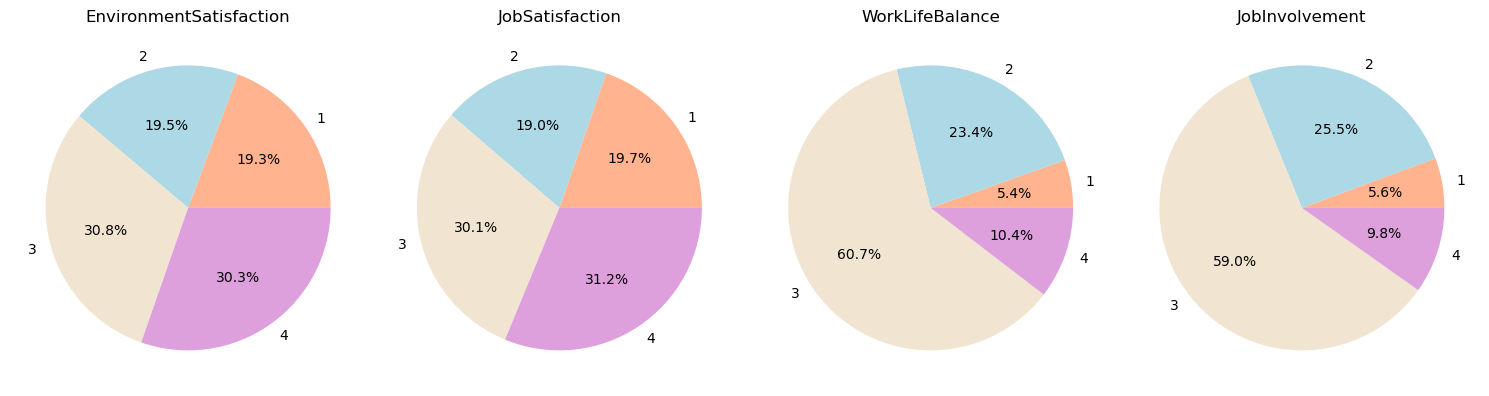

In [21]:
# fitur
stress = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement']

# subplot 1x4
fig, axes = plt.subplots(1, 4, figsize=(15,15))

for feature, ax in zip(stress, axes.flatten()):
    # persentase turnover
    persen_to = df[feature].value_counts(normalize=True).sort_index()
    
    # prep pie chart
    label = persen_to.index
    size = persen_to.values
    pastel_colors = ['#FFB38E', '#ADD8E6', '#F1E5D1', '#DDA0DD']

    # pie chart
    ax.pie(size,labels=label, autopct='%1.1f%%',colors=pastel_colors)

    # add-ons
    ax.set_title(feature)

# show plot
plt.tight_layout()
plt.show()


**Kepuasan Lingkungan & Pekerjaan:**<br>
Kepuasan lingkungan & pekerjaan menunjukkan grafik yang hampir serupa, dimana lebih dari separuh karyawan merasa puas dengan lingkungan dan pekerjaan mereka. Namun ada hampir 40% karyawan masih merasa belum puas.

**Work-Life Balance & Keterlibatan Kerja:**<br>
Sekitar 30% karyawan tidak puas baik terhadap work-life balance maupun keterlibatan kerja mereka. Hal ini mengindikasikan adanya tantangan seperti beban kerja yang berlebih, kurangnya motivasi, perasaan tidak diberdayakan, dll.

**Threshold Engagement Karyawan:**<br>
Berdasarkan informasi dari [Culture AMP](https://www.cultureamp.com/science/insights/all-industries-global?utm_source=chatgpt.com), median engagement dari seluruh industri ada di angka 71%.Hal ini berarti:
- Penilaian kepuasan terhadap Lingkungan kerja (61%), terhadap pekerjaannya (61%), dan keterlibatan kerja (69%) masih belum mencapai ambang batas dari kata engagement karyawan yang sehat. Maka dari itu, diperlukan perhatian khusus terhadap fitur-fitur tersebut.
- Penilaian kepuasan terhadap work-life balance sudah menyentuh angka 71%, tetapi angka tersebut belum melewatinya yang artinya fitur ini juga perlu mendapat perhatian.

### Stress Level dan Hubungannya dengan Atrisi Pegawai

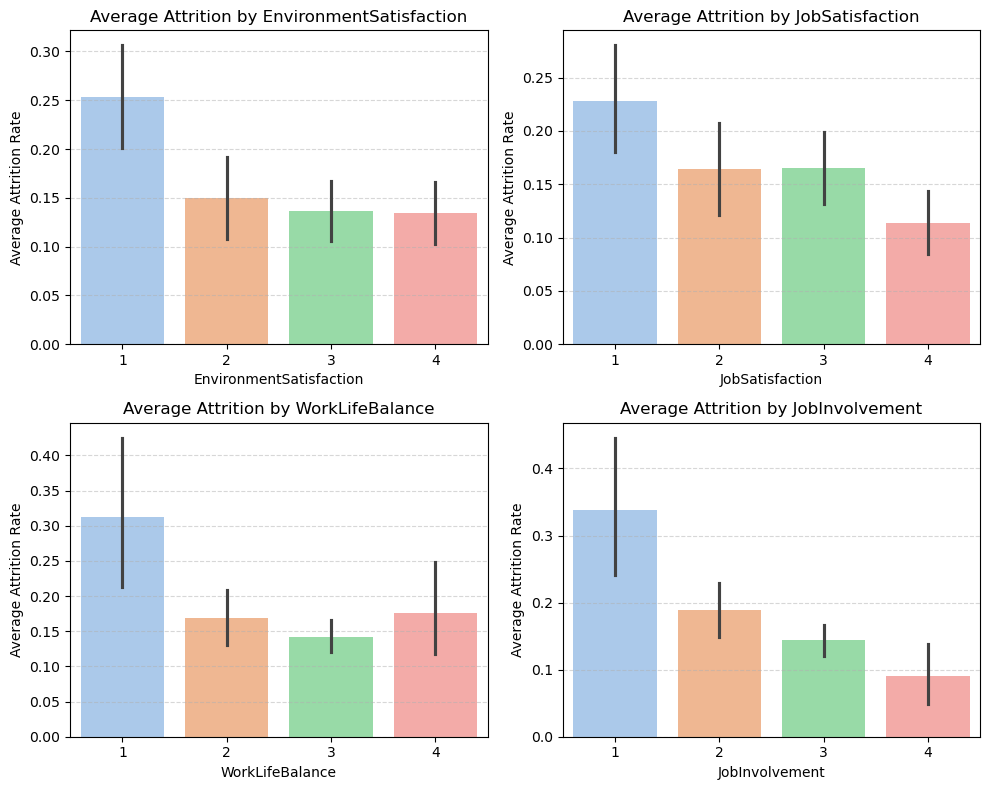

In [22]:
# fitur
stress = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement']

# buat subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# loop barplot
for feature, ax in zip(stress, axes.flatten()):
    # barplot
    sns.barplot(x=feature, y=df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0), 
                data=df, estimator=np.mean, ax=ax, 
                palette='pastel',hue=feature, legend=False)
    
    # add-ons
    ax.set_title(f'Average Attrition by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Average Attrition Rate')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# show plot
plt.tight_layout()
plt.show()


**Kepuasan Lingkungan dan Pekerjaannya:**<br>
Mayoritas karyawan merasa sangat tidak puas dengan lingkungan dan juga pekerjaannya. Karyawan yang merasa kurang puas terhadap lingkungan dan pekerjaannya lebih mungkin mengalami turnover, meskipun ada juga yang memberikan penilaian di angka 3 dan 4. Hal ini menunjukkan bahwa perbaikan lingkungan kerja dapat membantu mengurangi atrisi pegawai. Meningkatkan lingkungan kerja dan memastikan karyawan merasa puas dengan pekerjaan mereka dapat membantu mengurangi stress yang akhirnya dapat mengurangi atrisi pegawai.

**Work-Life Balance:**<br>
Pegawai yang melakukan turnover kebanyakan dikarenakan tidak puas dengan work-life balance yang ada di perusahaan saat ini. Untuk nilai 2-4, Distribusi work-life balance menunjukkan bahwa karyawan yang mengalami atrisi tersebar di seluruh nilai. Menurut [AIHR](https://www.aihr.com/blog/what-drives-employee-turnover/), work-life balance yang kurang baik dapat menjadi faktor stress yang signifikan bagi karyawan (employee burnout). Hal tersebut menunjukkan pentingknya work-life balance dalam sebuah perusahaan untuk menjaga stabilitas pegawainya. Maka dari itu, diperlukan adanya penilaian stress berkala kepada para pegawai.

**Keterlibatan Kerja:**<br>
Atrisi lebih tinggi terlihat pada karyawan dengan keterlibatan pekerjaan yang rendah (1). semakin karyawan merasa terlibat dengan pekerjaannya, semakin rendah kemungkinan mereka untuk turnover. Memastikan karyawan terlibat dalam pekerjaan mereka dapat membantu meningkatkan retensi.

## Atrisi Berdasarkan Departemen

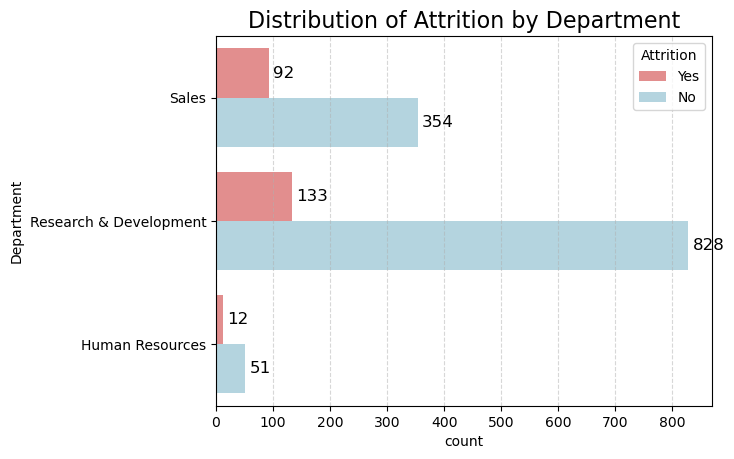

In [23]:
# countplot
plot = sns.countplot(y='Department', hue='Attrition', data=df, 
              palette={'Yes':'lightcoral', 'No':'lightblue'})

# add-ons
plt.title('Distribution of Attrition by Department', fontsize=16)
plt.grid(axis='x',linestyle='--',alpha=0.5)

# Add annotations
for container in plot.containers:
    # Add values above bars
    plot.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)

# show plot
plt.show()

**RnD & Sales dengan atrisi tinggi:**<br>
RnD dan Sales memiliki jumlah atrisi yang cukup tinggi. Hal ini menunjukkan adanya tantangan khusus dalam departemen-departemen tersebut yang perlu dianalisis lebih dalam, seperti beban kerja yang tinggi, kurangnya peluang pengembangan karir, atau tekanan dalam mencapai target.

**HR dengan Atrisi Terendah:**
departemen Human Resources memiliki atrisi terendah. Hal ini mungkin menandakan lingkungan kerja yang lebih sehat atau dikarenakan oleh ukuran departemen yang lebih kecil sehingga lebih sedikit terjadi turnover.

### Deep Dive Rnd & Sales

In [24]:
# Filter data untuk RnD dan Sales
rnd_sales_data = df[df['Department'].isin(['Research & Development', 'Sales'])]

# Lihat distribusi atrisi berdasarkan department
attrition_by_dept = rnd_sales_data.groupby(['Department', 'Attrition']).size().unstack()
print(attrition_by_dept)


Attrition                No  Yes
Department                      
Research & Development  828  133
Sales                   354   92


#### Beban Kerja di Departemen R&D dan Sales

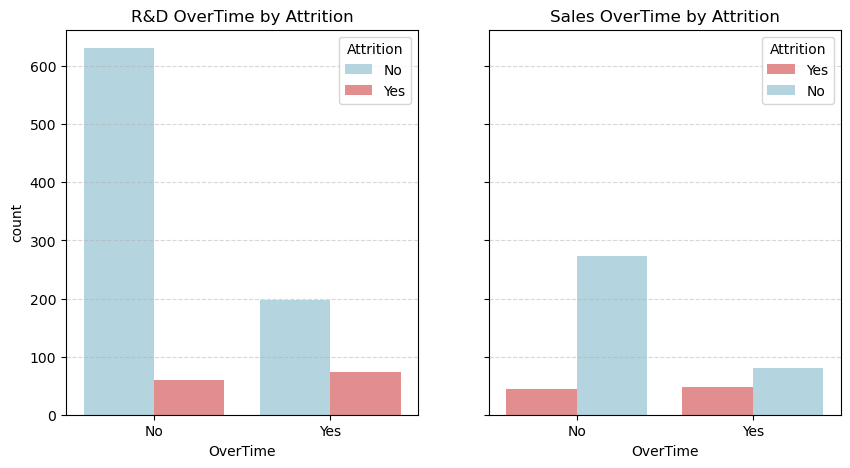

In [25]:
# add subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

# plot 1 R&D overtime
sns.countplot(x='OverTime', hue='Attrition', data=rnd, palette={'Yes': 'lightcoral', 'No': 'lightblue'}, ax=ax[0])
# add ons
ax[0].set_title('R&D OverTime by Attrition')
ax[0].grid(axis='y',linestyle='--',alpha=0.5)

# plot2 Sales Overtime
sns.countplot(x='OverTime', hue='Attrition', data=sales, palette={'Yes': 'lightcoral', 'No': 'lightblue'}, ax=ax[1])
# add ons
ax[1].set_title('Sales OverTime by Attrition')
ax[1].grid(axis='y',linestyle='--',alpha=0.5)

# show plot
plt.show()


**Tidak Lembur Cenderung Tetap Tinggal:**<br>
Di kedua departemen, karyawan yang tidak bekerja lembur cenderung lebih mungkin untuk tetap tinggal di perusahaan. Ini menunjukkan bahwa beban kerja yang tidak terlalu tinggi berkorelasi dengan kepuasan kerja yang lebih tinggi dan tingkat attrition yang lebih rendah.

**Lembur dan Turnover:**<br>
Karyawan yang bekerja lembur menunjukkan tingkat attrition yang lebih tinggi. Ini mungkin menunjukkan bahwa beban kerja yang berat dan waktu kerja yang lebih panjang dapat menyebabkan stress dan ketidakpuasan, yang akhirnya mendorong karyawan untuk meninggalkan perusahaan.

**Perbedaan Antar Departemen:**<br>
Meski pola yang sama terlihat di kedua departemen, jumlah total karyawan di R&D jauh lebih besar dibandingkan dengan Sales. Namun, tren yang menunjukkan hubungan antara lembur dan attrition konsisten di kedua departemen.

#### Kepuasan dan Lama Promosi

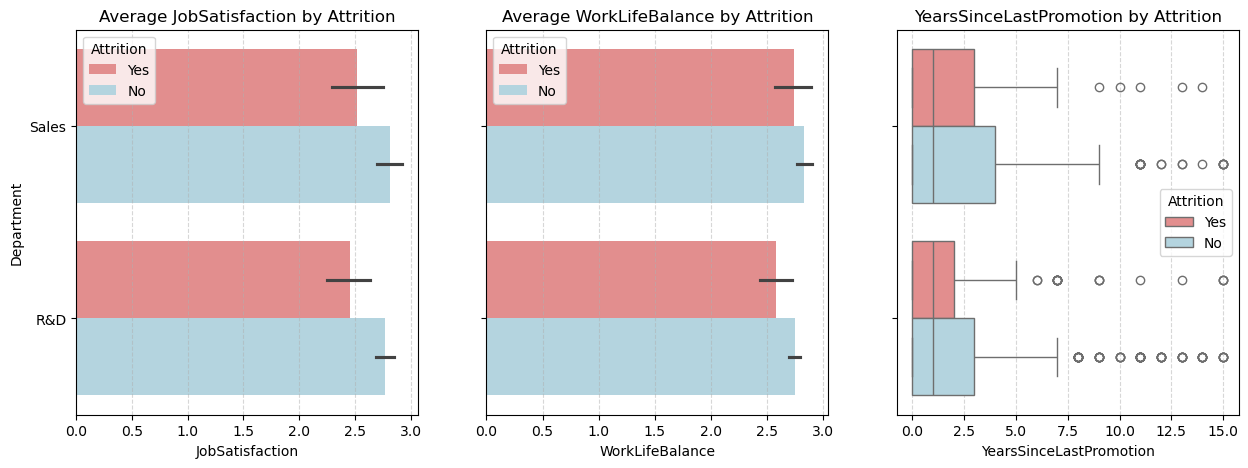

In [26]:
# add subplot
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# plot 1 R&D avg job satisfaction
sns.barplot(x='JobSatisfaction', y='Department', data=rnd_sales_data, estimator=lambda x: x.mean(), 
            hue='Attrition', palette={'Yes': 'lightcoral', 'No': 'lightblue'}, ax=ax[0])
# add ons
ax[0].set_title('Average JobSatisfaction by Attrition')
ax[0].grid(axis='x',linestyle='--',alpha=0.5)

# plot2 Sales avg work-life balance satisfaction
sns.barplot(x='WorkLifeBalance', y='Department', data=rnd_sales_data, estimator=lambda x: x.mean(),
            hue='Attrition', palette={'Yes': 'lightcoral', 'No': 'lightblue'}, ax=ax[1])
# add ons
ax[1].set_title('Average WorkLifeBalance by Attrition')
ax[1].grid(axis='x',linestyle='--',alpha=0.5)

#plot 3 boxplot years last promotion
sns.boxplot(y='Department', x='YearsSinceLastPromotion', data=rnd_sales_data,
            palette={'Yes': 'lightcoral', 'No': 'lightblue'},hue='Attrition', ax=ax[2])
# add ons
ax[2].set_title('YearsSinceLastPromotion by Attrition')
ax[2].grid(axis='x',linestyle='--',alpha=0.5)

# setting ytick    
plt.yticks(ticks=[0,1],labels=['Sales','R&D'])

# show plot
plt.show()

**Kepuasan Kerja & Work-Life Balance yang rendah:**<br>
Rentang satisfaction score berkisar dari 1-4, sedangkan rata-rata dari Job Satisfaction & Work-Life Balance baik di departemen Sales maupun R&D kurang dari 3, ini menunjukkan bahwa kepuasan karyawan secara umum berada di level yang menengah ke bawah. Ini adalah indikator bahwa banyak karyawan yang mungkin merasa tidak sepenuhnya puas dengan lingkungan kerja, pekerjaan mereka, maupun work-life balance. Meskipun sebagian besar karyawan tidak meninggalkan perusahaan, ketidakpuasan mereka dapat memengaruhi produktivitas, keterlibatan, dan moral secara keseluruhan. Jika tidak ditangani, hal ini bisa menyebabkan peningkatan turnover dan menghambat upaya retensi karyawan.

**Tidak butuh waktu lama setelah promosi untuk turnover:**<br>
Karyawan yang mengalami attrition di kedua departemen memiliki waktu sejak promosi terakhir yang lebih pendek dibandingkan dengan yang tetap tinggal. Ini bisa menunjukkan bahwa meskipun mereka menerima promosi baru-baru ini, mereka mungkin merasa kurang puas dengan peluang pengembangan karir jangka panjang atau tidak melihat prospek pertumbuhan lebih lanjut dalam perusahaan. Atau bisa jadi mereka sudah merasakan budaya kerja yang buruk di perusahaan.

### Atrisi berdasarkan Jenis Pekerjaan

sales: ['Sales Executive', 'Sales Manager', 'Sales Representative']
hr: ['Human Resources', 'HR Manager']
rnd: ['Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Research Director', 'RnD Manager']


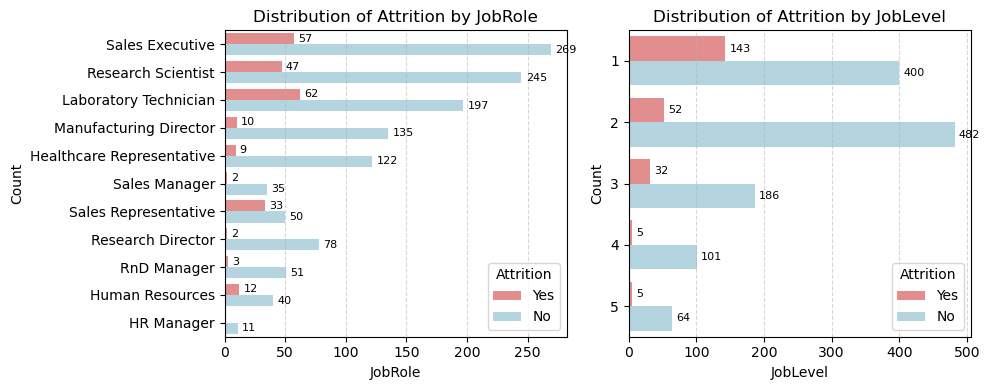

In [27]:
# check job role
print('sales:',sales['JobRole'].unique().tolist())
print('hr:',hr['JobRole'].unique().tolist())
print('rnd:',rnd['JobRole'].unique().tolist())

# fitur
stress = ['JobRole','JobLevel']

# buat subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# loop countplot
for feature, ax in zip(stress, axes.flatten()):
    # countplot
    plot = sns.countplot(y=feature, hue='Attrition', data=df, ax=ax, 
                  palette={'Yes':'lightcoral', 'No':'lightblue'})
    
    # add-ons
    ax.set_title(f'Distribution of Attrition by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.grid(axis='x',linestyle='--',alpha=0.5)


    # Add annotations
    for container in plot.containers:
        # Add values above bars
        plot.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=3)

# show plot
plt.tight_layout()
plt.show()

**Atrisi lebih sering terjadi pada jabatan yang lebih rendah:**<br>
Semakin rendah jabatan, semakin cenderung untuk turnover. Hal ini ditunjukkan oleh grafik job level, dimana jumlah turnover dari paling tinggi ke paling rendah secara berturut-turut dimulai dari level 1-2-3-4-5. Hal ini juga didukung oleh distribusi atrisi berdasarkan job role dimana jabatan paling rendah untuk atrisi adalah jabatan-jabatan pada tingkat Manager dan Director.

## Pengaruh Loyalitas dan Pendapatan Bulanan Terhadap Atrisi

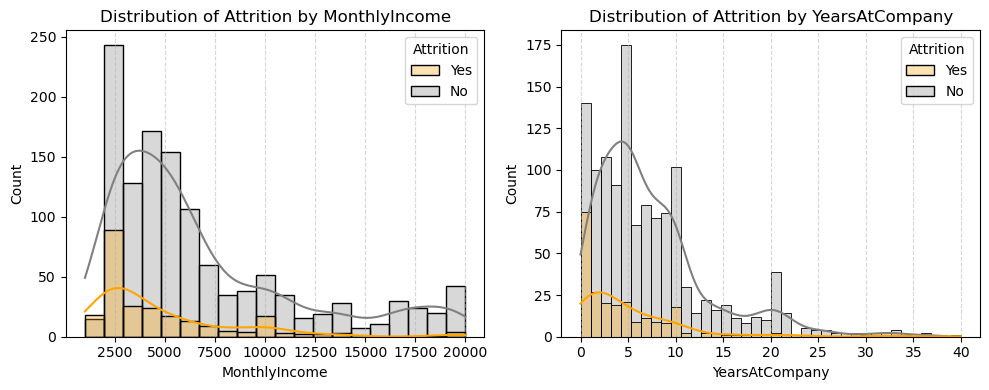

In [28]:
# fitur
stress = ['MonthlyIncome','YearsAtCompany']

# buat subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# loop countplot
for feature, ax in zip(stress, axes.flatten()):
    # countplot
    plot = sns.histplot(data=df, x=feature, hue='Attrition', kde=True,
                        palette={'Yes': 'orange', 'No': 'gray'}, ax=ax, alpha=0.3)

    # add-ons
    ax.set_title(f'Distribution of Attrition by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.grid(axis='x',linestyle='--',alpha=0.5)

# show plot
plt.tight_layout()
plt.show()

**Pendapatan bulanan yang lebih rendah:**<br>
Karyawan dengan pendapatan bulanan yang lebih rendah, sekitar 2500, memiliki tingkat atrisi yang lebih tinggi. Hal ini mungkin dikarenakan karyawan dengan gaji rendah merasa kurang dihargai, gaji yang terlalu rendah di levelnya, atau berhubungan dengan umur dimana karyawan yang memiliki gaji lebih rendah memiliki umur yang masih muda sehingga masih ada jiwa-jiwa untuk eksplorasi pekerjaan lain.

**Turnover pada Tenure Rendah:**<br>
Karyawan dengan masa kerja yang lebih pendek (0 hingga 5 tahun) memiliki jumlah attrition yang lebih tinggi. Ini menunjukkan bahwa karyawan yang baru bergabung dengan perusahaan mungkin masih dalam tahap penyesuaian dan lebih rentan untuk meninggalkan perusahaan jika mereka tidak merasa puas akan budaya kerja atau melihat prospek karier yang lebih baik. Hal ini menunjukkan pentingnya onboarding yang efektif dan memberikan dukungan tambahan kepada karyawan baru dapat membantu mengurangi attrition pada masa kerja yang pendek. Ini bisa mencakup pelatihan, mentoring, dan memastikan bahwa karyawan baru merasa terintegrasi dengan baik dalam perusahaan.

### Atrisi pada berbagai Job Level dan hunbungannya dengan pendapatan bulanan, umur, dan Promosi Kerja

In [29]:
# Menghitung median gaji dan median umur berdasarkan JobLevel
group_joblevel = df.groupby('JobLevel').agg({
    'MonthlyIncome': 'median',   # Median gaji
    'Age': 'median',              # Median umur
    'YearsSinceLastPromotion': 'median'
}).reset_index()

# Menampilkan hasil
group_joblevel

,JobLevel,MonthlyIncome,Age,YearsSinceLastPromotion
0,1,2670.0,31.0,1.0
1,2,5340.0,35.5,1.0
2,3,9980.0,38.0,2.0
3,4,16154.0,48.0,3.0
4,5,19232.0,48.0,2.0


In [30]:
df_to = df.copy()
df_to = df_to[df_to['Attrition']=='Yes']

# Menghitung median gaji dan median umur berdasarkan JobLevel
to_by_joblevel = df_to.groupby('JobLevel').agg({
    'MonthlyIncome': 'median',   # Median gaji
    'Age': 'median',              # Median umur
    'YearsSinceLastPromotion': 'median'
}).reset_index()

# Menampilkan hasil
to_by_joblevel

,JobLevel,MonthlyIncome,Age,YearsSinceLastPromotion
0,1,2437.0,29.0,0.0
1,2,5346.0,34.5,1.0
2,3,9887.0,38.5,3.0
3,4,13194.0,42.0,11.0
4,5,19545.0,52.0,6.0


**Atrisi pada Job Level 1-3**<br>
Pada Job Level 1-3, median dari umur pegawai masih termasuk ke dalam usia produktif. Atrisi pada level ini kemungkinan terjadi dikarenakan pegawai yang masih memiliki jiwa eksplorasi untuk mencoba pekerjaan lain atau pegawai yang mendapatkan pekerjaan lain dengan bayaran yang lebih besar.

**Atrisi pada Job Level 4**<br>
Melihat kedua tabel diatas, kemungkinan besar atrisi terjadi karena perbedaan pendapatan bulanan antara median pegawai (16154) dengan median pegawai yang turnover (13194) yang cukup signifikan. Selain itu, mayoritas karyawan membutuhkan lebih dari satu dekade untuk mencapai JobLevel 4 terhitung sangat lama terutama di dunia kerja modern di mana karyawan cenderung mencari kemajuan karir yang lebih cepat. Karyawan di level ini mungkin merasa stagnan meskipun gaji mereka cukup tinggi yang menyebabkan mereka turnover.

**Atrisi pada Job Level 5**<br>
Pada level ini, gaji tinggi dan pengalaman membuat karyawan lebih menarik di pasar kerja. Karyawan ini juga mungkin meninggalkan pekerjaan karena alasan pribadi (misalnya, pensiun dini atau mencari pekerjaan dengan tekanan lebih rendah).

## Pengaruh Durasi Jabatan dan Tenur Manager pada Atrisi Pegawai

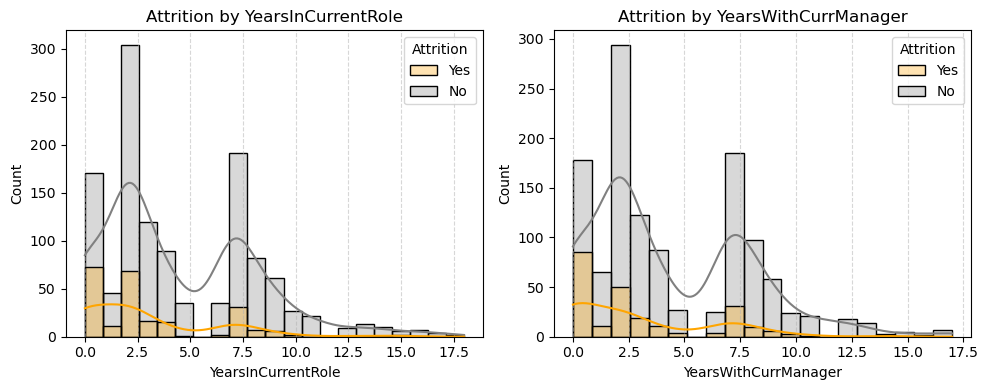

In [31]:
# fitur
stress = ['YearsInCurrentRole', 'YearsWithCurrManager']

# buat subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# loop countplot
for feature, ax in zip(stress, axes.flatten()):
    # countplot
    plot = sns.histplot(data=df, x=feature, hue='Attrition', kde=True,
                        palette={'Yes': 'orange', 'No': 'gray'}, ax=ax, alpha=0.3)

    # add-ons
    ax.set_title(f'Attrition by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.grid(axis='x',linestyle='--',alpha=0.5)

# show plot
plt.tight_layout()
plt.show()

**Masa awal menempati posisi yang rentan atrisi:**<br>
Sebagian besar karyawan meninggalkan perusahaan dalam 0-3 tahun di posisi mereka saat ini dan menurun seiring bertambahnya waktu. Hal ini bisa terjadi karena ekspektasi karyawan tidak terpenuhi atau kurangnya dukungan onboarding.

**Hubungan dengan Manager mempengaruhi Atrisi:**<br>
attrition tinggi pada masa awal bekerja dengan manajer baru (0-3 tahun). Ketika karyawan merasa kurang cocok dengan manajer, mereka cenderung keluar lebih cepat. Setelah 4 tahun dengan manajer yang sama, hubungan mungkin sudah stabil, sehingga karyawan lebih cenderung bertahan.

**Tahun-Tahun Awal yang sangat Kritis:**<br>
Tahun-tahun awal karyawan sangat kritis untuk retensi karyawan. Menetapkan ekspektasi yang jelas, dan mendorong hubungan kerja yang positif antara manajer dan karyawan selama 1-2 tahun pertama dan juga memberikan pelatihan manajerial sangat berguna untuk memperkuat hubungan antara pegawai dengan managernya yang juga dapat mengurangi atrisi.

# Kesimpulan

Berdasarkan analisis eksplorasi data yang telah dilakukan, berikut adalah beberapa poin penting yang mendukung pemahaman tentang faktor-faktor utama penyebab turnover serta strategi yang dapat diterapkan untuk mengurangi tingkat turnover sebesar 6% dalam waktu 12 bulan:

1. **Kelompok yang Rentan terhadap Turnover**:
   - **Usia Muda**: Karyawan yang berusia lebih muda cenderung memiliki tingkat turnover yang lebih tinggi. Faktor ini mungkin berkaitan dengan jiwa eksplorasi karir yang masih membara.
   - **Pendapatan Bulanan Rendah**: Karyawan dengan gaji yang lebih rendah cenderung merasa kurang dihargai dan lebih mudah tergoda untuk berpindah ke tempat kerja lain.
   - **Tenure Pendek**: Turnover lebih banyak terjadi pada karyawan dengan masa kerja 0-5 tahun, menunjukkan pentingnya proses onboarding dan pengelolaan ekspektasi sejak awal bekerja.

2. **Departemen dan Jabatan yang Berisiko**:
   - **RnD dan Sales**: Kedua departemen ini menunjukkan tingkat turnover yang tinggi, mungkin karena beban kerja yang berat, kurangnya peluang pengembangan karir, atau target kerja yang terlalu tinggi.
   - **Job Level Rendah (1-3)**: Jabatan di level yang lebih rendah memiliki tingkat turnover yang lebih tinggi, didorong oleh keinginan eksplorasi karir dan kompensasi yang tidak kompetitif.

3. **Faktor Lingkungan dan Kepuasan Kerja**:
   - Ketidakpuasan terhadap work-life balance,lingkungan kerja, keterlibatan kerja atau pekerjaan mereka merupakan salah empat pendorong signifikan turnover.

4. **Durasi dan Hubungan dengan Manajer**:
   - Turnover tinggi terjadi pada tahun-tahun awal masa jabatan dan hubungan dengan manajer. Hubungan yang tidak sesuai dengan manajer atau ekspektasi yang tidak terpenuhi di awal dapat mempercepat keputusan untuk meninggalkan perusahaan.


# Saran

**Kebutuhan untuk Strategi Khusus**:
   - **Karyawan Baru**: Fokus pada onboarding yang efektif, mentoring, dan membangun hubungan kerja yang positif dengan manajer untuk mengurangi risiko turnover di awal masa kerja.
   - **Peningkatan Kepuasan Kerja**: Mengidentifikasi dan mengatasi faktor-faktor ketidakpuasan, seperti beban kerja yang berlebihan dan kurangnya peluang pengembangan karir.
   - **Revisi Struktur Kompensasi**: Meninjau kembali struktur gaji, terutama bagi karyawan dengan pendapatan rendah dan mereka yang berada di job level rendah hingga menengah.
   - **Perbaikan Work-Life Balance**: Memberikan fleksibilitas lebih dalam jadwal kerja atau beban kerja untuk meningkatkan kepuasan terhadap work-life balance.